In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rcParams.update({
    "text.usetex":True,
    "font.family":"serif",
})

In [2]:
xlabel_kwargs = {'fontsize':15}
ylabel_kwargs = {'fontsize':15}
legend_kwargs = {'fontsize':12}
title_kwargs = {'fontsize':18}
xticks_kwargs = {'fontsize':12}
yticks_kwargs = {'fontsize':12}

In [3]:
cwd = os.getcwd()

gru_dname_list = [
    cwd + '/saved_AR_AERNN_rnn/AR_rnn_{:03d}'.format(i) for i in range(2, 6)
]

print('gru_dname : ', gru_dname_list)

gru_dname :  ['/home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_AR_AERNN_rnn/AR_rnn_002', '/home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_AR_AERNN_rnn/AR_rnn_003', '/home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_AR_AERNN_rnn/AR_rnn_004', '/home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_AR_AERNN_rnn/AR_rnn_005']


In [4]:
plot_dir = cwd + '/study-04/plots'

if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

In [5]:
gru_ph_list_global = []
gru_numoutsteps_global = []
for gru_dname in gru_dname_list:
    gru_ph_list = []
    gru_numoutsteps = []
    for fname in os.listdir(gru_dname):
        if fname.endswith('.npz') and fname.startswith('prediction_horizon'):
            gru_ph_list.append(gru_dname + '/' + fname)
            fname = fname[0:-4]
            fname = fname[::-1]
            idx = fname.find('--')
            fname = fname[8:idx]
            fname = fname[::-1]
            if fname == 'ZERO':
                gru_numoutsteps.append(0)
            else:
                gru_numoutsteps.append(int(fname))

    print(gru_ph_list)
    print(gru_numoutsteps)

    gru_ph_list = np.array(gru_ph_list)
    gru_numoutsteps = np.array(gru_numoutsteps)

    sort_idx = np.argsort(gru_numoutsteps)
    gru_numoutsteps = gru_numoutsteps[sort_idx]
    gru_ph_list = gru_ph_list[sort_idx]

    print('')
    print(gru_ph_list)
    print(gru_numoutsteps)
    
    gru_ph_list_global.append(gru_ph_list)
    gru_numoutsteps_global.append(gru_numoutsteps)
    
    print('\n\n\n')

['/home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_AR_AERNN_rnn/AR_rnn_002/prediction_horizons-testingdata--20outsteps.npz', '/home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_AR_AERNN_rnn/AR_rnn_002/prediction_horizons-testingdata--ZEROoutsteps.npz', '/home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_AR_AERNN_rnn/AR_rnn_002/prediction_horizons-testingdata--10outsteps.npz', '/home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_AR_AERNN_rnn/AR_rnn_002/prediction_horizons-testingdata--60outsteps.npz', '/home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_AR_AERNN_rnn/AR_rnn_002/prediction_horizons-testingdata--40outsteps.npz']
[20, 0, 10, 60, 40]

['/home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_AR_AERNN_rnn/AR_rnn_002/prediction_horizons-testingdata--ZEROoutsteps.npz'
 '/home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_AR_AERNN_rnn/AR_rnn_002/prediction_horizons-testingdata--10outsteps.npz'
 '/home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_AR_AERNN_rnn/AR_rnn_002/predict

In [6]:
gru_ph_arr_list_global = []
gru_medians_global = []
for ii in range(len(gru_ph_list_global)):
    gru_ph_list = gru_ph_list_global[ii]
    gru_ph_arr_list = []
    gru_medians = []
    for fname in gru_ph_list:
        with np.load(fname, allow_pickle=True) as f:
            try:
                ph_arr = f['prediction_horizon_arr']
            except:
                for key in f.keys():
                    if key.find('og') != -1:
                        ph_arr = f[key]
                        break
            gru_ph_arr_list.append(ph_arr)
        num_runs = ph_arr.shape[0]
        ph_arr.sort()
        gru_medians.append(ph_arr[int(0.5*num_runs-1)])
    print(gru_medians)

    gru_ph_arr_list_global.append(gru_ph_arr_list)
    gru_medians_global.append(gru_medians)
    print('\n\n')

gru_ph_arr_list_global = np.array(gru_ph_arr_list_global)

print(gru_ph_list)
print(gru_ph_arr_list_global.shape)

[1.2866284909623313, 1.774192971748057, 1.8554537185456779, 2.1263228745377476, 2.166953247936558]



[1.4491499845575733, 2.112779416738144, 2.2346705369345754, 2.383648572730214, 2.695148102121094]



[1.6252149359524186, 2.01797521214092, 2.05860558553973, 2.546170066325456, 2.6003438975238695]



[1.47623690015678, 1.611671478152815, 2.221127079134972, 2.5732569819246627, 2.7357784755199046]



['/home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_AR_AERNN_rnn/AR_rnn_005/prediction_horizons-testingdata--ZEROoutsteps.npz'
 '/home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_AR_AERNN_rnn/AR_rnn_005/prediction_horizons-testingdata--10outsteps.npz'
 '/home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_AR_AERNN_rnn/AR_rnn_005/prediction_horizons-testingdata--20outsteps.npz'
 '/home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_AR_AERNN_rnn/AR_rnn_005/prediction_horizons-testingdata--40outsteps.npz'
 '/home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_AR_AERNN_rnn/AR_rnn_005/prediction

In [7]:
def gru_plot(box_or_violin, idx_plot=-1):
    yticks_min = 0
    yticks_max = int(np.max(gru_ph_arr_list_global[:, idx_plot])+1)
    yticks_pos = np.arange(yticks_min, yticks_max+1, 1)

    # box_or_violin = 2 # 0 == box
    #                   # 1 == violin
    #                   # 2 == box with violin super-imposed
    if box_or_violin == 0:
        parts = plt.boxplot(
            list(gru_ph_arr_list_global[:, idx_plot]),
        )
    elif box_or_violin == 1:
        parts = plt.violinplot(
            list(gru_ph_arr_list_global[:, idx_plot]),
            showmedians=True
        )
    elif box_or_violin == 2:
        parts = plt.violinplot(
            list(gru_ph_arr_list_global[:, idx_plot]),
        )
        parts['cmaxes'].set(linewidth=0.)
        parts['cmins'].set(linewidth=0.)
        parts['cbars'].set(linewidth=0.)
        # parts['medians'].set(linewidth=0.)
        parts2 = plt.boxplot(
            list(gru_ph_arr_list_global[:, idx_plot]),
        )
    
    plt.grid(True)
    plt.xticks(
        np.arange(gru_ph_arr_list_global.shape[0]) + 1,
        ['single\nlayer', 'Euler', 'RK2', 'RK4'],
    #     ('Teacher\nforced',) + tuple([str(elem) for elem in esn_numoutsteps[1:]]),
        **xticks_kwargs
    )
    plt.yticks(yticks_pos, **yticks_kwargs)
    plt.xlabel('Layering Configuration', **xlabel_kwargs)
    plt.ylabel('Prediction Horizon [LT]', **ylabel_kwargs)
    plt.title('GRU', **title_kwargs)

    if box_or_violin == 0:
        savefig_name = 'gru-study04--boxplot.pdf'
    elif box_or_violin == 1:
        savefig_name = 'gru-study04--violinplot.pdf'
    elif box_or_violin == 2:
        savefig_name = 'gru-study04--boxandviolinplot.pdf'

    plt.savefig(plot_dir+'/'+savefig_name, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    
#     # plt.violinplot(
#     #     list(gru_ph_arr_list_global[:, -1]),
#     #     showmedians=True,
#     # #     quantiles=[[0.25, 0.75] for i in range(gru_ph_arr_list_global.shape[0])],
#     # )
#     plt.boxplot(
#         list(gru_ph_arr_list_global[:, -1]),
#     #     showmedians=True,
#     #     quantiles=[[0.25, 0.75] for i in range(gru_ph_arr_list_global.shape[0])],
#     )
#     plt.grid(True)
#     plt.xticks(
#         np.arange(gru_ph_arr_list_global.shape[0]) + 1,
#         ['20', '50', '80'],
#     #     ('Teacher\nforced',) + tuple([str(elem) for elem in esn_numoutsteps[1:]]),
#         **xticks_kwargs
#     )
#     plt.yticks(**yticks_kwargs)
#     plt.xlabel(r'$n^r \atop{^{(\mathrm{layer \ size} = n^{r} \times n^{ls})}}$', fontsize=20)#**xlabel_kwargs)
#     plt.ylabel('Prediction Horizon [LT]', **ylabel_kwargs)
#     plt.title('GRU', **title_kwargs)

#     plt.savefig(plot_dir+'/gru-study02--boxplot.pdf', dpi=300, bbox_inches='tight')
#     # plt.savefig(plot_dir+'/gru-study02--violinplot.pdf', dpi=300, bbox_inches='tight')
#     plt.show()

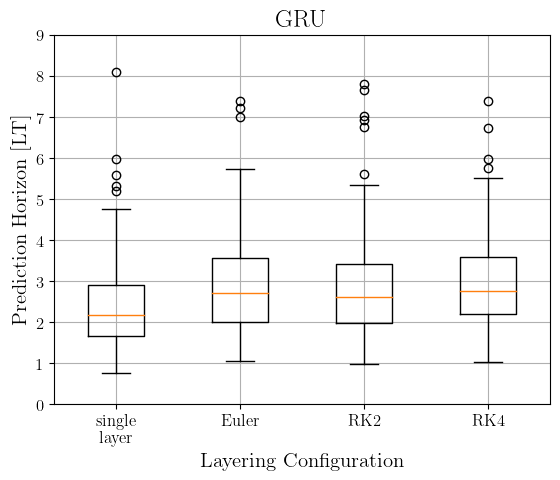

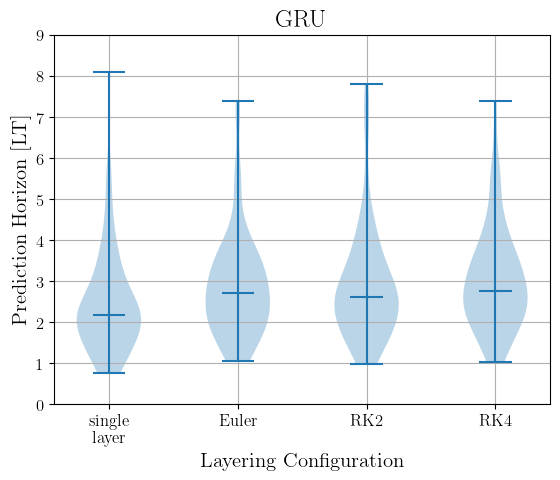

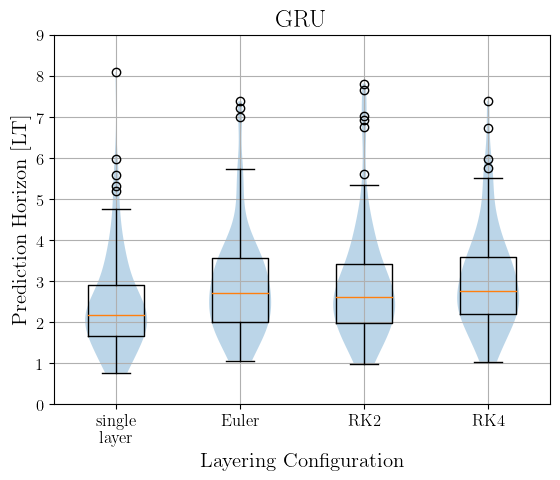

In [8]:
for i in range(3):
    gru_plot(i)